In [ ]:
# No missing data
# Categorical features (except 'Age')
# Random Forest Accuracy: 100%

# IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [2]:
data_dir = '/kaggle/input/differentiated-thyroid-cancer-recurrence/Thyroid_Diff.csv'
data = pd.read_csv(data_dir)

# EDA

In [3]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
# Label Encoding 
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

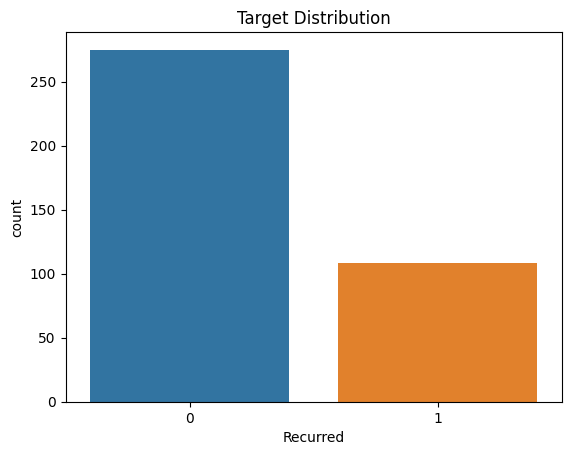

In [6]:
# Check target 
sns.countplot(data= data, x='Recurred')
plt.title(f'Target Distribution')
plt.show()

In [7]:
X = data.drop('Recurred', axis=1)
y = data['Recurred']


# MODELS

In [8]:
def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Support Vector Machine': SVC(kernel = 'linear',
                                      random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False,
                                 max_depth = 5,
                                 eval_metric='logloss',
                                 random_state=42)
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

In [9]:
if __name__ == "__main__":
    train_and_evaluate_models(X, y)

Logistic Regression - Accuracy: 0.9310, F1 Score: 0.9291
Decision Tree - Accuracy: 0.9310, F1 Score: 0.9325
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000
Support Vector Machine - Accuracy: 0.9655, F1 Score: 0.9646
XGBoost - Accuracy: 0.9828, F1 Score: 0.9830
